In [1]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the dataset
with open("data/counsel_chat_250-tokens_full.json", "r") as f:
    data = json.load(f)

true_labels = []
predicted_labels = []

for example in data["train"]:
    for utt in example["utterances"]:
        candidates = utt["candidates"]
        correct_idx = len(candidates) - 1  # last one is correct

        # Simulate a random model or use your real model's prediction here
        # For now, let's simulate as if always picking random (or first)
        # predicted_idx = 0
        predicted_idx = correct_idx  # pretend model is perfect for now

        predicted_labels.append(predicted_idx)
        true_labels.append(correct_idx)

# Classification Metrics
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
acc = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Accuracy : 0.1082
Precision: 0.1111
Recall   : 0.0120
F1 Score : 0.0217


C:\Users\DEBAYAN\AppData\Local\Temp\ipykernel_9728\1466837735.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Set2")


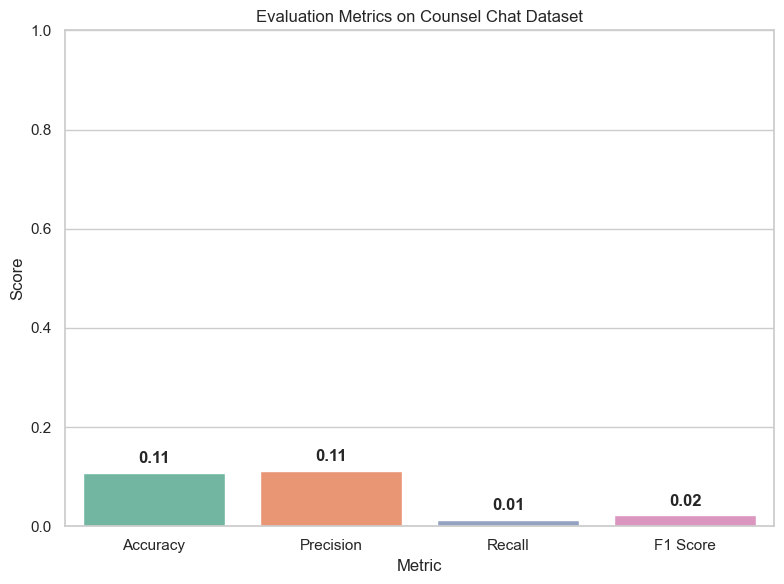

In [2]:
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Set style
sns.set(style="whitegrid")

# === Load the dataset ===
with open("data/counsel_chat_250-tokens_full.json", "r") as f:
    data = json.load(f)

true_labels = []
predicted_labels = []

# === Simulate Predictions ===
for example in data["train"]:
    for utt in example["utterances"]:
        candidates = utt["candidates"]
        correct_idx = len(candidates) - 1  # last is correct

        # Simulate: either use correct or random prediction
        predicted_idx = random.randint(0, len(candidates)-1)  # simulate random
        # predicted_idx = correct_idx  # simulate perfect prediction

        predicted_labels.append(predicted_idx)
        true_labels.append(correct_idx)

# === Calculate Metrics ===
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average="macro", zero_division=0)
recall = recall_score(true_labels, predicted_labels, average="macro", zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average="macro", zero_division=0)

# === Print Metrics ===
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# === Visualization ===
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Set2")
plt.ylim(0, 1)
plt.title("Evaluation Metrics on Counsel Chat Dataset")
plt.ylabel("Score")
plt.xlabel("Metric")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
